In [ ]:
# dataset @ https://finance.yahoo.com/quote/MSFT/history/

# If you want the exact same dataset as the YouTube video,
# use this link: https://drive.google.com/file/d/1WLm1AEYgU28Nk4lY4zNkGPSctdImbhJI/view?usp=sharing

In [ ]:
import pandas as pd

df = pd.read_csv('EURUSD.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-02-10,1.074229,1.075176,1.066928,1.074229,1.074229,0
1,2023-02-13,1.067771,1.072501,1.065723,1.067771,1.067771,0
2,2023-02-14,1.073042,1.079844,1.070996,1.073042,1.073042,0
3,2023-02-15,1.073572,1.074460,1.066598,1.073572,1.073572,0
4,2023-02-16,1.069176,1.072225,1.065575,1.069176,1.069176,0
...,...,...,...,...,...,...,...
256,2024-02-05,1.078004,1.078749,1.072466,1.078004,1.078004,0
257,2024-02-06,1.074183,1.076310,1.072455,1.074183,1.074183,0
258,2024-02-07,1.075720,1.078435,1.075639,1.075720,1.075720,0
259,2024-02-08,1.077575,1.078981,1.074310,1.077575,1.077575,0


In [ ]:
df = df[['Date', 'Close']]

df

,Date,Close
0,2023-02-10,1.074229
1,2023-02-13,1.067771
2,2023-02-14,1.073042
3,2023-02-15,1.073572
4,2023-02-16,1.069176
...,...,...
256,2024-02-05,1.078004
257,2024-02-06,1.074183
258,2024-02-07,1.075720
259,2024-02-08,1.077575


In [ ]:
df['Date']

0      2023-02-10
1      2023-02-13
2      2023-02-14
3      2023-02-15
4      2023-02-16
          ...    
256    2024-02-05
257    2024-02-06
258    2024-02-07
259    2024-02-08
260    2024-02-09
Name: Date, Length: 261, dtype: object

In [ ]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [ ]:
df

,Date,Close
0,2023-02-10,1.074229
1,2023-02-13,1.067771
2,2023-02-14,1.073042
3,2023-02-15,1.073572
4,2023-02-16,1.069176
...,...,...
256,2024-02-05,1.078004
257,2024-02-06,1.074183
258,2024-02-07,1.075720
259,2024-02-08,1.077575


In [ ]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-14-f6fc52bb0fa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0     2023-02-10
1     2023-02-13
2     2023-02-14
3     2023-02-15
4     2023-02-16
         ...    
256   2024-02-05
257   2024-02-06
258   2024-02-07
259   2024-02-08
260   2024-02-09
Name: Date, Length: 261, dtype: datetime64[ns]

In [ ]:
df.index = df.pop('Date')
df

,Close
Date,
2023-02-10,1.074229
2023-02-13,1.067771
2023-02-14,1.073042
2023-02-15,1.073572
2023-02-16,1.069176
...,...
2024-02-05,1.078004
2024-02-06,1.074183
2024-02-07,1.075720


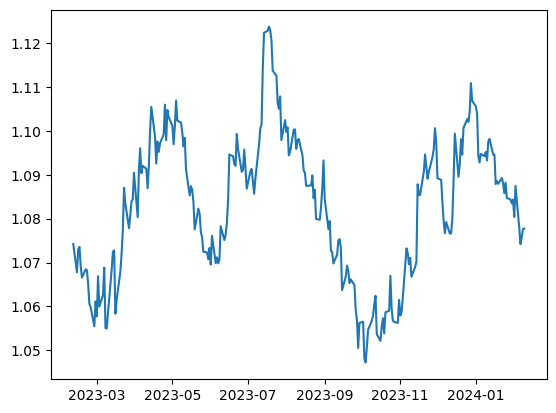

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [ ]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '2023-02-15',
                                '2024-02-09',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2023-02-15,1.074229,1.067771,1.073042,1.073572
1,2023-02-16,1.067771,1.073042,1.073572,1.069176
2,2023-02-17,1.073042,1.073572,1.069176,1.066576
3,2023-02-20,1.073572,1.069176,1.066576,1.068444
4,2023-02-21,1.069176,1.066576,1.068444,1.068262
...,...,...,...,...,...
253,2024-02-05,1.084340,1.080392,1.087465,1.078004
254,2024-02-06,1.080392,1.087465,1.078004,1.074183
255,2024-02-07,1.087465,1.078004,1.074183,1.075720
256,2024-02-08,1.078004,1.074183,1.075720,1.077575


In [ ]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((258,), (258, 3, 1), (258,))

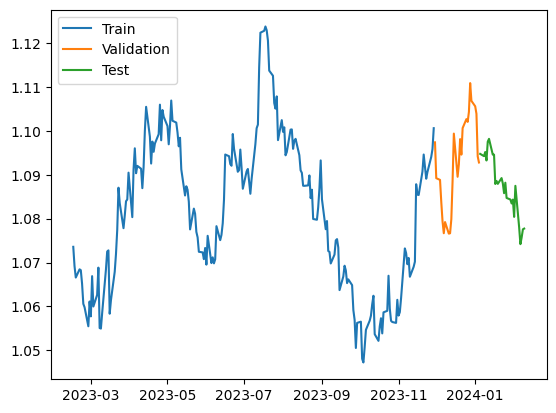

In [ ]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
pip install tensorflow

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 3s 104ms/step - loss: 1.1715 - mean_absolute_error: 1.0813 - val_loss: 1.0180 - val_mean_absolute_error: 1.0089
Epoch 2/100
7/7 [==============================] - 0s 9ms/step - loss: 0.9133 - mean_absolute_error: 0.9550 - val_loss: 0.8013 - val_mean_absolute_error: 0.8951
Epoch 3/100
7/7 [==============================] - 0s 9ms/step - loss: 0.6961 - mean_absolute_error: 0.8333 - val_loss: 0.5640 - val_mean_absolute_error: 0.7510
Epoch 4/100
7/7 [==============================] - 0s 9ms/step - loss: 0.4473 - mean_absolute_error: 0.6665 - val_loss: 0.2934 - val_mean_absolute_error: 0.5416
Epoch 5/100
7/7 [==============================] - 0s 10ms/step - loss: 0.1887 - mean_absolute_error: 0.4277 - val_loss: 0.0623 - val_mean_absolute_error: 0.2495
Epoch 6/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0208 - mean_absolute_error: 0.1184 - val_loss: 0.0064 - val_mean_absolute_error: 0.0798
Epoch 7/100
7/7 [==============

7/7 [==============================] - 0s 3ms/step


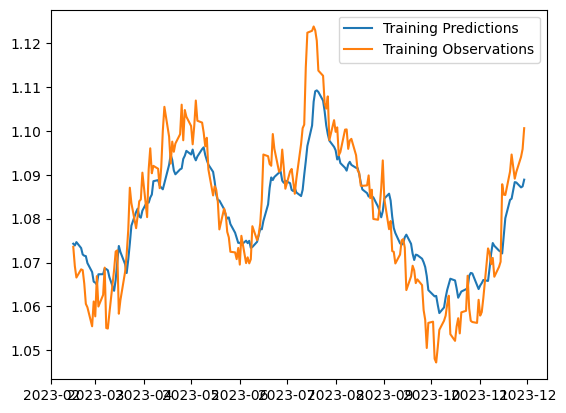

In [ ]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 22ms/step


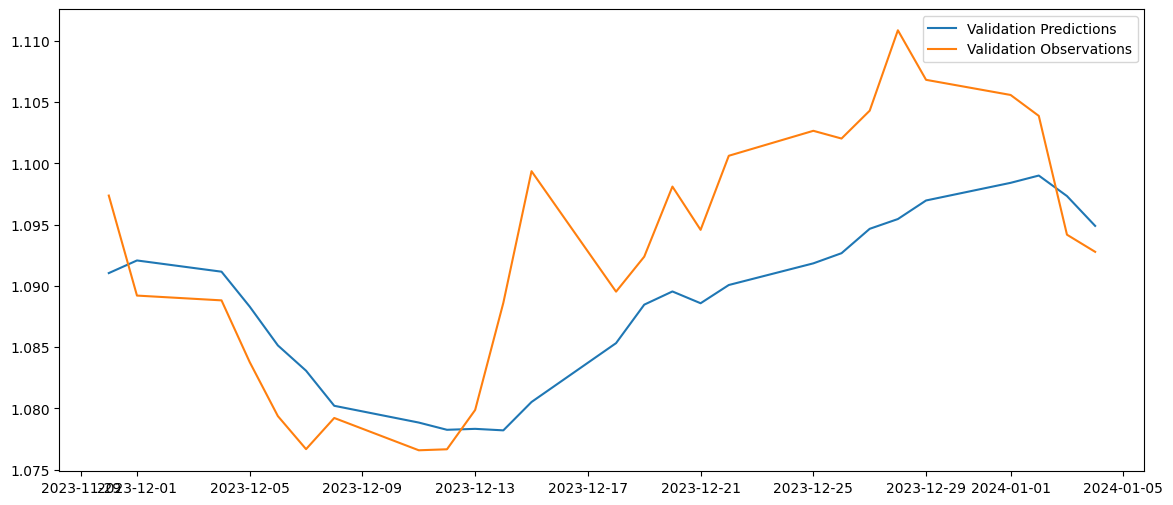

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.figure(figsize=(14, 6))
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 22ms/step


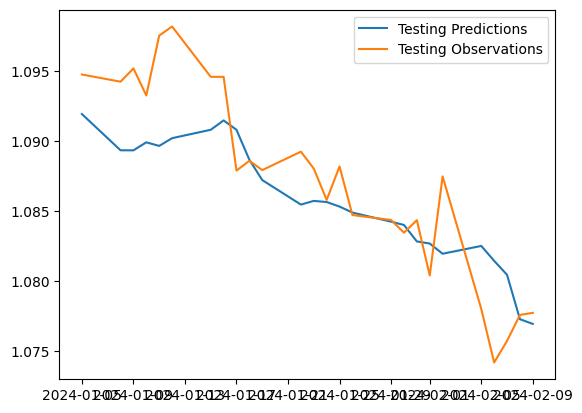

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

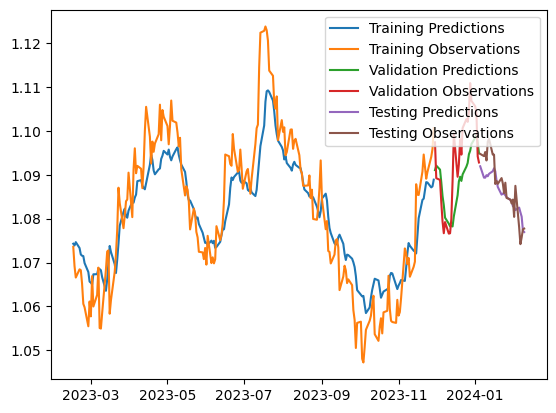

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])